In [43]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 1024*3
hidden_size = 500
num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.CIFAR10(root='../../data',        
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

Files already downloaded and verified
Epoch [1/15], Step [300/500], Loss: 1.8697
Epoch [2/15], Step [300/500], Loss: 1.6817
Epoch [3/15], Step [300/500], Loss: 1.6816
Epoch [4/15], Step [300/500], Loss: 1.5306
Epoch [5/15], Step [300/500], Loss: 1.5579
Epoch [6/15], Step [300/500], Loss: 1.5364
Epoch [7/15], Step [300/500], Loss: 1.4349
Epoch [8/15], Step [300/500], Loss: 1.4449
Epoch [9/15], Step [300/500], Loss: 1.5286
Epoch [10/15], Step [300/500], Loss: 1.5195
Epoch [11/15], Step [300/500], Loss: 1.5488
Epoch [12/15], Step [300/500], Loss: 1.3466
Epoch [13/15], Step [300/500], Loss: 1.2682
Epoch [14/15], Step [300/500], Loss: 1.2004
Epoch [15/15], Step [300/500], Loss: 1.2825


In [44]:
import torch
import torch.nn as nn
from torchsummary import summary

class CIFAR10(nn.Module):
    def __init__(self):
        super(CIFAR10, self).__init__()
        self.pad1 = nn.ZeroPad2d((2, 2, 2, 2))
        
        self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(7, 7), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=32),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
        )
    
        self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5, 5), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=64),
        nn.ReLU()
        )
        
        self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=128),
        nn.MaxPool2d(kernel_size=(3,3)),
        nn.ReLU()
        )
        
        self.fc1 = nn.Sequential(
        nn.Linear(in_features=1152, out_features=512),
        nn.ReLU()
        )
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Sequential(
        nn.Linear(in_features=512, out_features=10),
        nn.Softmax()
        )
        
    def forward(self, x):
        x = self.pad1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        x = self.dropout1(x)
        out = self.fc2(x)
        
        return out
      
my_model = CIFAR10().to(device)
summary(my_model, input_size=(3, 32, 32))  

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 3, 36, 36]               0
            Conv2d-2           [-1, 32, 30, 30]           4,704
       BatchNorm2d-3           [-1, 32, 30, 30]              64
         MaxPool2d-4           [-1, 32, 15, 15]               0
              ReLU-5           [-1, 32, 15, 15]               0
            Conv2d-6           [-1, 64, 11, 11]          51,200
       BatchNorm2d-7           [-1, 64, 11, 11]             128
              ReLU-8           [-1, 64, 11, 11]               0
            Conv2d-9            [-1, 128, 9, 9]          73,728
      BatchNorm2d-10            [-1, 128, 9, 9]             256
        MaxPool2d-11            [-1, 128, 3, 3]               0
             ReLU-12            [-1, 128, 3, 3]               0
           Linear-13                  [-1, 512]         590,336
             ReLU-14                  [

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
my_model = CIFAR10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_model.parameters(), lr=learning_rate) 

In [46]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images_np = np.asarray(images)
        images = images.reshape(-1, 3, 32, 32).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = my_model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/15], Step [100/500], Loss: 2.0212
Epoch [1/15], Step [200/500], Loss: 2.0668
Epoch [1/15], Step [300/500], Loss: 2.0412
Epoch [1/15], Step [400/500], Loss: 2.0278
Epoch [1/15], Step [500/500], Loss: 1.9098
Epoch [2/15], Step [100/500], Loss: 1.9468
Epoch [2/15], Step [200/500], Loss: 1.9195
Epoch [2/15], Step [300/500], Loss: 2.0424
Epoch [2/15], Step [400/500], Loss: 1.9922
Epoch [2/15], Step [500/500], Loss: 1.9600
Epoch [3/15], Step [100/500], Loss: 1.9038
Epoch [3/15], Step [200/500], Loss: 1.8945
Epoch [3/15], Step [300/500], Loss: 1.8352
Epoch [3/15], Step [400/500], Loss: 1.8234
Epoch [3/15], Step [500/500], Loss: 1.8969
Epoch [4/15], Step [100/500], Loss: 1.8238
Epoch [4/15], Step [200/500], Loss: 1.8464
Epoch [4/15], Step [300/500], Loss: 1.8711
Epoch [4/15], Step [400/500], Loss: 1.9298
Epoch [4/15], Step [500/500], Loss: 1.8614
Epoch [5/15], Step [100/500], Loss: 1.7542
Epoch [5/15], Step [200/500], Loss: 1.7581
Epoch [5/15], Step [300/500], Loss: 1.7489
Epoch [5/15

In [30]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 3, 32, 32).to(device)
        labels = labels.to(device)
        outputs = my_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the 10000 test images: 64.4 %


In [0]:
for param in my_model.parameters():
    param.requires_grad= False

In [33]:
l =[]
sign = []
for epoch in range(1):
    for i, (images, labels) in enumerate(test_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 3, 32, 32).to(device)
        images.requires_grad=True
        labels = labels.to(device)
        
        # Forward pass
        outputs = my_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize

        loss.backward()
        c =images.grad.sign()
        images = images+ 0.01* c
        sign.append(c)
        l.append((images,labels))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
im, _ = l[0]
im = im.data.cpu().numpy()

In [0]:
im = im.reshape(100, 3, 32, 32)

In [0]:
import matplotlib.pyplot as plt


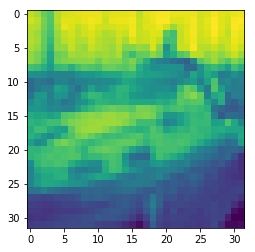

In [39]:
plt.imshow(im[2, 0, :, :])

In [41]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in l:
        images = images.reshape(-1, 3, 32, 32).to(device)
        labels = labels.to(device)
        outputs = my_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the 10000 test images: 48.88 %
